# Inteligencia artificial aplicada al Diaguita
## Modelo 2: de Classification supervised learning

En este modelo creamos la bag of words con TfidfVectorizer y la clasificación con Naive Bayes(MultinomialNB)

Utilizmos bienes ya catalogados extraidos de la base de una universidad para el entrenamiento y testeo del modelo

Utilizmos como input la descripción de los items y como target/ label/ output el rubro de los items

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
import glob
csv_files = glob.glob('/home/daro40/Documentos/categorizador/bases/renglones_*.csv')
print(csv_files)

['/home/daro40/Documentos/categorizador/bases/renglones_unm.csv', '/home/daro40/Documentos/categorizador/bases/renglones_unsam.csv', '/home/daro40/Documentos/categorizador/bases/renglones_unr.csv', '/home/daro40/Documentos/categorizador/bases/renglones_unahur.csv', '/home/daro40/Documentos/categorizador/bases/renglones_unpsjb.csv', '/home/daro40/Documentos/categorizador/bases/renglones_unpa.csv', '/home/daro40/Documentos/categorizador/bases/renglones_unvm.csv', '/home/daro40/Documentos/categorizador/bases/renglones_unlam.csv', '/home/daro40/Documentos/categorizador/bases/renglones_unrn.csv', '/home/daro40/Documentos/categorizador/bases/renglones_unt.csv', '/home/daro40/Documentos/categorizador/bases/renglones_unlp.csv', '/home/daro40/Documentos/categorizador/bases/renglones_unmdp.csv', '/home/daro40/Documentos/categorizador/bases/renglones_unicen.csv', '/home/daro40/Documentos/categorizador/bases/renglones_unam.csv', '/home/daro40/Documentos/categorizador/bases/renglones_unq.csv', '/ho

In [55]:
bases=[]
for filename in csv_files:
    base=pd.read_csv(filename)
    bases.append(base) # result a list of dataframes
df_renglones=pd.concat(bases)

In [56]:
catalogo=pd.read_csv(r'/home/daro40/Documentos/categorizador/bases/catalogos.csv')

In [57]:
rubro=pd.read_csv(r'/home/daro40/Documentos/categorizador/bases/rubro.csv')

In [58]:
#Eliminamos renglones con datos faltantes
df_renglones=df_renglones.dropna()

In [59]:
df_renglones['id_catalogo_bien_servicio']=df_renglones['id_catalogo_bien_servicio'].astype(int)

In [60]:
df_renglones['rubro']=df_renglones['rubro'].astype(int)

In [61]:
catalogo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7517 entries, 0 to 7516
Data columns (total 2 columns):
id_catalogo_bien_servicio    7517 non-null int64
nombre                       7517 non-null object
dtypes: int64(1), object(1)
memory usage: 117.6+ KB


In [62]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(catalogo["nombre"])

#list(le.classes_)

catalogo['nombre_map']=le.transform(catalogo["nombre"]) 

#list(le.inverse_transform([2, 2, 1]))

In [63]:
catalogo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7517 entries, 0 to 7516
Data columns (total 3 columns):
id_catalogo_bien_servicio    7517 non-null int64
nombre                       7517 non-null object
nombre_map                   7517 non-null int64
dtypes: int64(2), object(1)
memory usage: 176.3+ KB


In [64]:
#Hacemos un merge de las tablas que tienen los renglones, con descripción, rubro, y demás datos, con la de catálogos
df_combinado=pd.merge(df_renglones,catalogo)

In [65]:
df_combinado['nombre_map']=le.transform(df_combinado["nombre"])

In [66]:
df_combinado=pd.merge(df_combinado,rubro,on='rubro')

In [67]:
df_combinado.head(10)

,descripcion_x,rubro,id_catalogo_bien_servicio,nombre,nombre_map,descripcion_y
0,Taco adhesivo en cinco colores flúor medida 50...,2,10000841,REPUESTO PAPEL MULTICOLOR,5931,"LIBRERIA,PAP. Y UTILES OFICINA"
1,Taco adhesivo en cinco colores flúor medida 76...,2,10000841,REPUESTO PAPEL MULTICOLOR,5931,"LIBRERIA,PAP. Y UTILES OFICINA"
2,"Indicadores 12x45 x 25 h x 5, en cinco colore...",2,10000841,REPUESTO PAPEL MULTICOLOR,5931,"LIBRERIA,PAP. Y UTILES OFICINA"
3,Taco 9x9 por 400 hojas en cinco colores fluor,2,10000841,REPUESTO PAPEL MULTICOLOR,5931,"LIBRERIA,PAP. Y UTILES OFICINA"
4,Taco de hojas de papel multicolor. 9 x 9 cm. 4...,2,10000841,REPUESTO PAPEL MULTICOLOR,5931,"LIBRERIA,PAP. Y UTILES OFICINA"
5,Taco de hojas de papel multicolor. 9 x 9 cm. 4...,2,10000841,REPUESTO PAPEL MULTICOLOR,5931,"LIBRERIA,PAP. Y UTILES OFICINA"
6,Taco de hojas de papel multicolor. 9 x 9 cm ap...,2,10000841,REPUESTO PAPEL MULTICOLOR,5931,"LIBRERIA,PAP. Y UTILES OFICINA"
7,TACOS DE PAPEL MULTICOLORES,2,10000841,REPUESTO PAPEL MULTICOLOR,5931,"LIBRERIA,PAP. Y UTILES OFICINA"
8,Tacos multicolor 9x9 x 400 hojas,2,10000841,REPUESTO PAPEL MULTICOLOR,5931,"LIBRERIA,PAP. Y UTILES OFICINA"
9,"TACOS DE PAPEL MULTICOLOR X 400, SIN AUTOADHES...",2,10000841,REPUESTO PAPEL MULTICOLOR,5931,"LIBRERIA,PAP. Y UTILES OFICINA"


In [68]:
df_combinado['descripcion']=df_combinado['descripcion_x']+' '+df_combinado['descripcion_y']

In [69]:
df_combinado.head(10)

,descripcion_x,rubro,id_catalogo_bien_servicio,nombre,nombre_map,descripcion_y,descripcion
0,Taco adhesivo en cinco colores flúor medida 50...,2,10000841,REPUESTO PAPEL MULTICOLOR,5931,"LIBRERIA,PAP. Y UTILES OFICINA",Taco adhesivo en cinco colores flúor medida 50...
1,Taco adhesivo en cinco colores flúor medida 76...,2,10000841,REPUESTO PAPEL MULTICOLOR,5931,"LIBRERIA,PAP. Y UTILES OFICINA",Taco adhesivo en cinco colores flúor medida 76...
2,"Indicadores 12x45 x 25 h x 5, en cinco colore...",2,10000841,REPUESTO PAPEL MULTICOLOR,5931,"LIBRERIA,PAP. Y UTILES OFICINA","Indicadores 12x45 x 25 h x 5, en cinco colore..."
3,Taco 9x9 por 400 hojas en cinco colores fluor,2,10000841,REPUESTO PAPEL MULTICOLOR,5931,"LIBRERIA,PAP. Y UTILES OFICINA",Taco 9x9 por 400 hojas en cinco colores fluor...
4,Taco de hojas de papel multicolor. 9 x 9 cm. 4...,2,10000841,REPUESTO PAPEL MULTICOLOR,5931,"LIBRERIA,PAP. Y UTILES OFICINA",Taco de hojas de papel multicolor. 9 x 9 cm. 4...
5,Taco de hojas de papel multicolor. 9 x 9 cm. 4...,2,10000841,REPUESTO PAPEL MULTICOLOR,5931,"LIBRERIA,PAP. Y UTILES OFICINA",Taco de hojas de papel multicolor. 9 x 9 cm. 4...
6,Taco de hojas de papel multicolor. 9 x 9 cm ap...,2,10000841,REPUESTO PAPEL MULTICOLOR,5931,"LIBRERIA,PAP. Y UTILES OFICINA",Taco de hojas de papel multicolor. 9 x 9 cm ap...
7,TACOS DE PAPEL MULTICOLORES,2,10000841,REPUESTO PAPEL MULTICOLOR,5931,"LIBRERIA,PAP. Y UTILES OFICINA","TACOS DE PAPEL MULTICOLORES LIBRERIA,PAP. Y UT..."
8,Tacos multicolor 9x9 x 400 hojas,2,10000841,REPUESTO PAPEL MULTICOLOR,5931,"LIBRERIA,PAP. Y UTILES OFICINA","Tacos multicolor 9x9 x 400 hojas LIBRERIA,PAP...."
9,"TACOS DE PAPEL MULTICOLOR X 400, SIN AUTOADHES...",2,10000841,REPUESTO PAPEL MULTICOLOR,5931,"LIBRERIA,PAP. Y UTILES OFICINA","TACOS DE PAPEL MULTICOLOR X 400, SIN AUTOADHES..."


In [70]:
lista=df_combinado['nombre'].value_counts()>300

In [71]:
lista=lista[lista==True]

In [72]:
lista=lista.to_frame()

In [73]:
lista.index

Index(['LIBROS', 'UTILES DE ESCRIOTRIO, OFICINA Y ENSEÑANZA',
       'BIENES DE CONSUMO', 'ELEMENTOS DE LIMPIEZA', 'OTROS N.E.P.',
       'LIBROS REVISTAS Y OTROS ELEMENTOS COLEC.', 'BIENES DE USO',
       'CARTUCHO TONER', 'LOCACION DE SERVICIOS',
       'UTILES Y MATERIALES ELECTRICOS', 'REPUESTOS Y ACCESORIOS',
       'UTILES MENORES MEDICO QUIRURJICO LABORAT', 'EQUIPO PARA COMPUTACION',
       'COMPUESTOS QUIMICOS', 'ALIMENTOS PARA PERSONAS',
       'EQUIPO DE OFICINA Y MUEBLES', 'PAPEL DE ESCRITORIO Y CARTON',
       'REACTIVO', 'SERVICIO DE IMPRESION', 'VIGILANCIA Y CUSTODIA',
       'CARTUCHO DE TINTA', 'LIBRO', 'CABLE', 'PASAJE', 'MARCADORES',
       'MANTENIMIENTO DE VEHICULO', 'SEGURO ACCIDENTES PERSONALES', 'CARNE',
       'MANTEN.Y REPARAC. DE EDIFICIOS Y LOCALES',
       'CONSTRUC. EN BIENES DE DOMINIO PRIVADO', 'COMPUTADORA',
       'EQUIPO SANITARIO Y DE LABORATORIO', 'SEGURO AUTOMOTOR', 'SILLA',
       'PAPELES EN HOJAS', 'PRODUCTOS FARMACEUTICOS Y MEDICINALES',
       

In [74]:
df_combinado_elite=df_combinado[df_combinado['nombre'].isin(lista.index)]

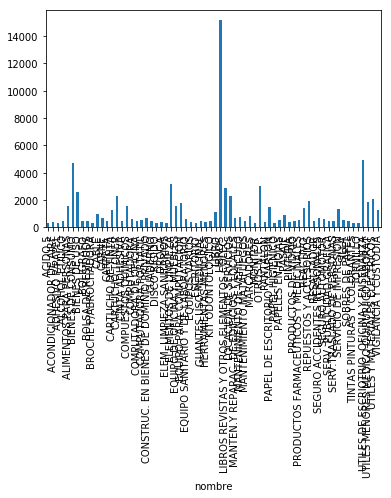

In [75]:
df_combinado_elite.groupby("nombre")['nombre'].count().plot.bar()

In [76]:
df_combinado_elite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83454 entries, 18 to 161035
Data columns (total 7 columns):
descripcion_x                83454 non-null object
rubro                        83454 non-null int64
id_catalogo_bien_servicio    83454 non-null int64
nombre                       83454 non-null object
nombre_map                   83454 non-null int64
descripcion_y                83454 non-null object
descripcion                  83454 non-null object
dtypes: int64(3), object(4)
memory usage: 5.1+ MB


In [77]:
lista_excedidos=df_combinado_elite['nombre'].value_counts()>300
lista_excedidos=lista_excedidos[lista_excedidos==True]


In [78]:
lista_excedidos=lista_excedidos.to_frame()
lista_excedidos.index

Index(['LIBROS', 'UTILES DE ESCRIOTRIO, OFICINA Y ENSEÑANZA',
       'BIENES DE CONSUMO', 'ELEMENTOS DE LIMPIEZA', 'OTROS N.E.P.',
       'LIBROS REVISTAS Y OTROS ELEMENTOS COLEC.', 'BIENES DE USO',
       'CARTUCHO TONER', 'LOCACION DE SERVICIOS',
       'UTILES Y MATERIALES ELECTRICOS', 'REPUESTOS Y ACCESORIOS',
       'UTILES MENORES MEDICO QUIRURJICO LABORAT', 'EQUIPO PARA COMPUTACION',
       'COMPUESTOS QUIMICOS', 'ALIMENTOS PARA PERSONAS',
       'EQUIPO DE OFICINA Y MUEBLES', 'PAPEL DE ESCRITORIO Y CARTON',
       'REACTIVO', 'SERVICIO DE IMPRESION', 'VIGILANCIA Y CUSTODIA',
       'CARTUCHO DE TINTA', 'LIBRO', 'CABLE', 'PASAJE', 'MARCADORES',
       'MANTENIMIENTO DE VEHICULO', 'SEGURO ACCIDENTES PERSONALES', 'CARNE',
       'MANTEN.Y REPARAC. DE EDIFICIOS Y LOCALES',
       'CONSTRUC. EN BIENES DE DOMINIO PRIVADO', 'COMPUTADORA',
       'EQUIPO SANITARIO Y DE LABORATORIO', 'SEGURO AUTOMOTOR', 'SILLA',
       'PAPELES EN HOJAS', 'PRODUCTOS FARMACEUTICOS Y MEDICINALES',
       

In [79]:
#Armo un diccionario con los dataframe para cada categoria que tiene más de 200 muestras
d = {}
for i in lista_excedidos.index:
    d[i] = df_combinado_elite[df_combinado_elite.nombre==i]
# Elimino del dataframe total todos las categorias que tienen más de 200 muestras
df_combinado_elite_scat=df_combinado_elite
for i in lista_excedidos.index:
    indexNames = df_combinado_elite[ df_combinado_elite['nombre'] == i].index
    df_combinado_elite_scat=df_combinado_elite_scat.drop(indexNames)
#undersumpling de cada dataframe
df_combinado_elite_act=df_combinado_elite_scat
undersample={}
for i in lista_excedidos.index:
    undersample[i] = d[i].sample(300)
#df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
    df_combinado_elite_act = pd.concat([undersample[i], df_combinado_elite_act], axis=0)
    


In [111]:
df_combinado_elite_act.groupby("nombre")['nombre']

AttributeError: Cannot access callable attribute 'to_csv' of 'SeriesGroupBy' objects, try using the 'apply' method

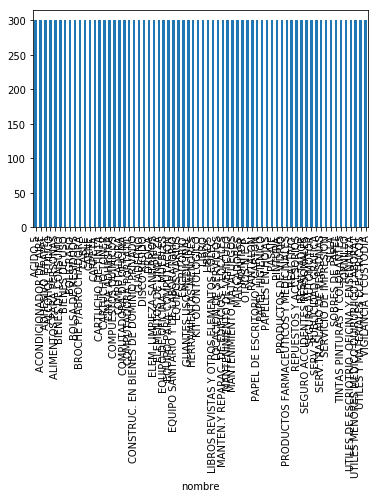

In [81]:
df_combinado_elite_act.groupby("nombre")['nombre'].count().plot.bar()

In [82]:
import pickle
#import joblib
#joblib.dump(df_combinado_elite_act,'df_combiando_elite_act.pkl')
pickle.dump(df_combinado_elite_act,open( 'df.pkl','wb'))

In [83]:
#Armamos la feature (por ahora una sola, la descripción), y primero pasamos todas las letras a minusculas
X=df_combinado_elite_act['descripcion'].str.lower()

In [84]:
#Primero utilizamos como label el rubro
y=df_combinado_elite_act['nombre_map']

In [85]:
#y=pd.get_dummies(y)

In [86]:
#Armamos una lista con las stopwords de español
from nltk.corpus import stopwords
stopwords.fileids()
stopWords = set(stopwords.words('spanish'))

In [87]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/daro40/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [88]:
def tokenizator(text):
    
    # Tokenize by sentence, then by word
    tokens = [sent for text in nltk.sent_tokenize(text) for sent in nltk.word_tokenize(text)]
    
    
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    
    return filtered_tokens


In [89]:
#Para armar el bag of words(BoW) utilizamos el TfidfVectorizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
#Revisar parámetros
tfidf = TfidfVectorizer(min_df=1, stop_words=stopWords,tokenizer=tokenizator) #token_pattern=r'(?u)\b[A-Za-z]+\b'

X_tf = tfidf.fit_transform(X)

#tfidf.get_feature_names()

In [90]:
#Dividimos la base para entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_tf, y, test_size = 0.2, random_state=42)

In [91]:
y_train

58085       98
69686     3737
156791    6945
8705      2204
91389     5963
          ... 
97122     1933
128686    4202
7011      5964
138895    2585
26010     2703
Name: nombre_map, Length: 16320, dtype: int64

In [92]:
X_train

<16320x22114 sparse matrix of type '<class 'numpy.float64'>'
	with 143029 stored elements in Compressed Sparse Row format>

In [93]:
tfidf.get_feature_names()

["'caelb",
 "'s",
 '***se',
 '**características',
 '*-trabajos',
 '*accidente',
 '*asistencia',
 '*bluetooth',
 '*compra',
 '*disco',
 '*edición',
 '*garantía',
 '*impreso',
 '*invalides',
 '*las',
 '*lector',
 '*manual',
 '*memo',
 '*micro',
 '*mother',
 '*muerte',
 '*pantalla',
 '*peso',
 '*preferencia',
 '*prestaciones',
 '*procesador',
 '*puerto',
 '*puertos',
 '*revisión',
 '*rw-graba',
 '+/-0.004a',
 '+/-0.008a',
 '+/-1nm',
 '+/-2nm',
 '+1000gradosc',
 '+40ºc',
 '+50ºc',
 '+5a',
 '+atrapar',
 '+cable',
 '+cd',
 '+configuracion',
 '+fichas',
 '+fma',
 '+fucilera',
 '+funciones',
 '+no',
 '+presentación',
 '+producto',
 '+reles',
 '+sensor',
 '+tarugo',
 ',25x76',
 '-+40°c',
 '-10g',
 '-10°a',
 '-10°c',
 '-17ppm-32mb-laser',
 '-1999max',
 '-1cd1121-i',
 '-1x',
 '-2005497fabricación',
 '-20ºc',
 '-20ºca',
 '-220g',
 '-25g',
 '-2max',
 '-30c',
 '-34db',
 '-4-benzopyrone',
 '-50gradosc',
 '-96dbm',
 '-9ºc',
 '-a4',
 '-a55m-ds2',
 '-agua',
 '-aire',
 '-aislación',
 '-alicate',
 '-alime

In [94]:
X_tf[0:10]

<10x22114 sparse matrix of type '<class 'numpy.float64'>'
	with 87 stored elements in Compressed Sparse Row format>

# use DMatrix for xgbosot
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# use svmlight file for xgboost
from sklearn.datasets import dump_svmlight_file

dump_svmlight_file(X_train, y_train, 'dtrain.svm', zero_based=True)
dump_svmlight_file(X_test, y_test, 'dtest.svm', zero_based=True)
dtrain_svm = xgb.DMatrix('dtrain.svm')
dtest_svm = xgb.DMatrix('dtest.svm')


# set xgboost params
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

# training and testing - numpy matrices
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

In [95]:
#Utilizamos Naive Bayes para la clasificación
from sklearn.naive_bayes import MultinomialNB
y_train=y_train.astype('int')
mnb=MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

pl.fit(X_train, y_train)

In [96]:
#Medimos la precisión del modelo
mnb.score(X_test,y_test)

0.7362745098039216

In [97]:
#joblib.dump(mnb,'mnb.pkl')
pickle.dump(mnb,open( 'model.pkl','wb'))

In [98]:
y_pred= mnb.predict(X_test)

In [99]:
from sklearn.metrics import classification_report
report=classification_report(y_test, y_pred)

In [100]:
print(report)

              precision    recall  f1-score   support

          98       0.87      0.76      0.81        68
         172       0.72      0.90      0.80        60
         216       0.88      0.86      0.87        44
         298       0.58      0.56      0.57        70
         347       0.98      0.95      0.97        59
         987       1.00      0.15      0.26        59
         988       0.67      0.18      0.28        57
        1020       0.78      0.91      0.84        65
        1035       0.93      1.00      0.96        64
        1134       0.72      0.91      0.80        56
        1195       0.78      0.86      0.81        69
        1469       1.00      0.97      0.98        61
        1473       0.64      0.90      0.75        49
        1512       0.82      0.87      0.85        76
        1525       0.72      0.78      0.75        64
        1717       0.88      0.95      0.91        59
        1932       0.59      0.59      0.59        49
        1933       0.47    

In [119]:
#Verificamos la predicción del modelo con algunos posibles items:

test=pd.Series(['impresora hp informatica','monitor led 19 informatica', 'notebook i7 informatica', 'silla equipo de oficina y muebles','pizarrón', 'escritorio de melamina' ], name='descripcion')
#test=pd.Series([''], name='descripcion')

test_tf=tfidf.transform(test)

c= mnb.predict(test_tf)
print(c)
#list(le.inverse_transform([60,75,80,264,275,505,5634]))

[1525 4575 1936 6459 5113 2776]


In [120]:
list(le.inverse_transform(c))


['CARTUCHO TONER',
 'MONITOR',
 'COMPUTADORA PORTATIL',
 'SILLA',
 'PINTURA',
 'ESCRITORIO']

In [121]:
#joblib.dump(le, 'decoder.pkl')
pickle.dump(le,open( 'encoder.pkl','wb'))

In [104]:
list(le.inverse_transform([13]))

['4`6-DIAMIN.-2-PHEN. DIHYDR. HY']